In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

In [14]:
# Load features 
features_path = "../data/preprocessed_data.csv"
features_df_org = pd.read_csv(features_path)

# non_features 
non_features = ['participants', 'recordings', 'Extraversion', 'Agreeableness',
       'Conscientiousness', 'Emotional Stability', 'Openness',
       'Extraversion_bin', 'Agreeableness_bin', 'Conscientiousness_bin',
       'Emotional Stability_bin', 'Openness_bin']

# drop participants id
features_df = features_df_org.drop(columns=non_features)

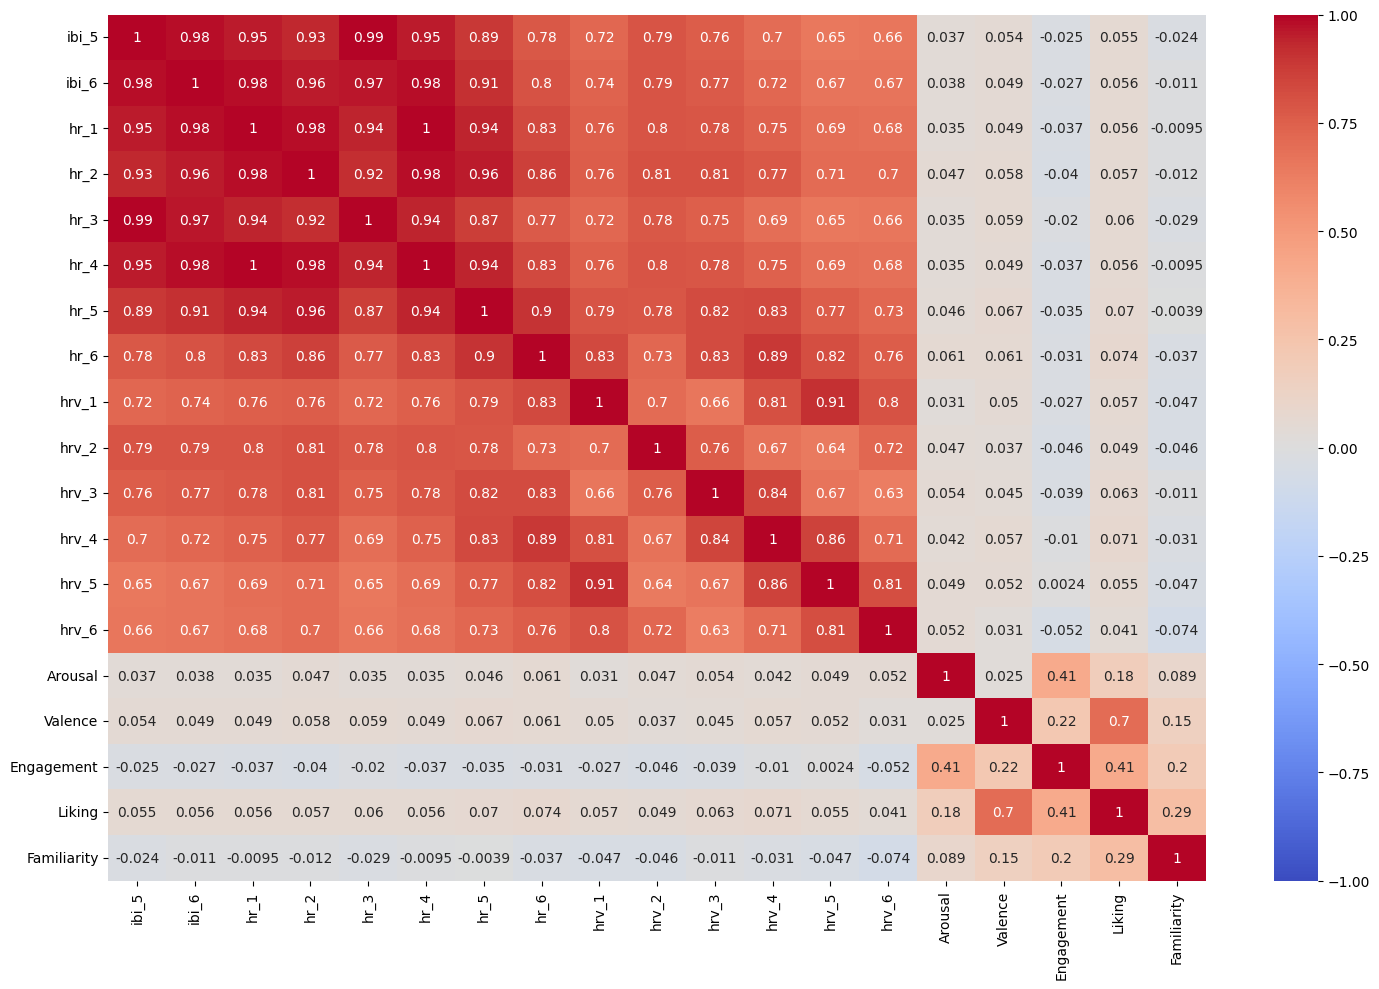

In [15]:
matrix = features_df.corr()
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
sns.heatmap(matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.tight_layout()
plt.savefig('figures/correlation_matrix.png', bbox_inches='tight')
plt.show()

In [16]:
#define PCA model to use
n_components=15
pca = PCA(n_components=n_components)

#fit PCA model to data
pca_fit = pca.fit(features_df)

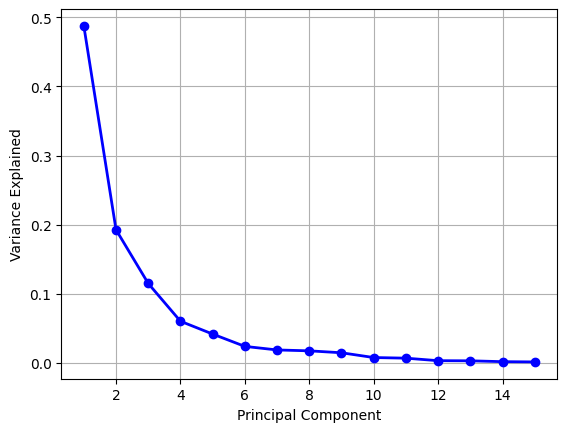

In [17]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()

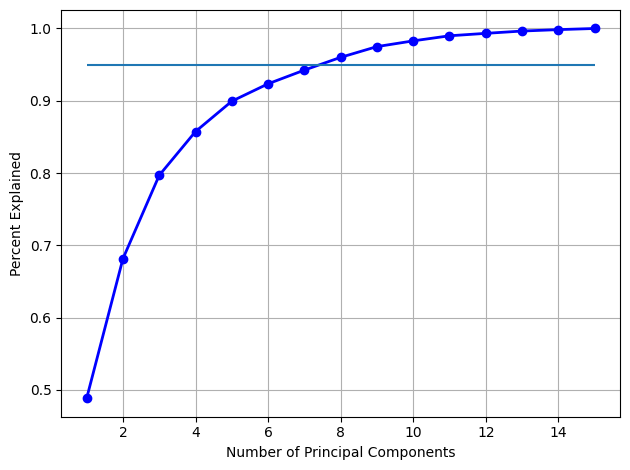

In [18]:
percent_explained = np.cumsum(pca.explained_variance_ratio_)/np.sum(pca.explained_variance_ratio_)
plt.plot(PC_values, percent_explained, 'o-', linewidth=2, color='blue')
plt.hlines(0.95,1,15)
plt.xlabel('Number of Principal Components')
plt.ylabel('Percent Explained')
plt.grid()
plt.tight_layout()
plt.savefig('figures/scree_plot.png')
plt.show()